In [873]:
%autosave 1

Autosaving every 1 seconds


In [806]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from itertools import product
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import math
from datetime import timedelta
import random

In [200]:
df = pd.read_excel('electric_dataset.xlsx')

In [201]:
df = df.replace({True: 1, False: 0})

In [202]:
df

,StationID,Station_Name,Station_Type,Station_Category,Station_Access,ChargerID,Ping_Date,hour0,hour1,hour2,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
0,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-25,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-26,1,1,1,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-27,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-28,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-29,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-26,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22526,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-27,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22527,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-28,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22528,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-29,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [203]:
df = df.drop(df.index[-1])

In [204]:
df

,StationID,Station_Name,Station_Type,Station_Category,Station_Access,ChargerID,Ping_Date,hour0,hour1,hour2,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
0,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-25,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-26,1,1,1,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-27,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-28,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-29,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22524,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-25,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22525,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-26,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22526,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-27,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22527,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-28,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [205]:
df.dropna()

,StationID,Station_Name,Station_Type,Station_Category,Station_Access,ChargerID,Ping_Date,hour0,hour1,hour2,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
0,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-25,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-26,1,1,1,...,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-27,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-28,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0124a793-6b67-4690-8348-54666a807fe7,SRI VARU CELESTIAL APARTMENT,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S009464-1,2023-11-29,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22524,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-25,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22525,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-26,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22526,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-27,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22527,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-28,1,1,1,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [206]:
df['Operational_status'] = 1

In [376]:
hour_columns = [f'hour{i}' for i in range(24)]
hour_data = df[hour_columns]

row_means = hour_data.sum(axis=1)

df['Operational_status'] = row_means

In [377]:
# df['Operational_status']= df['Operational_status'].apply(lambda x: 0 if x < 0.5 else 1)


In [381]:
df.tail(100)

,StationID,Station_Name,Station_Type,Station_Category,Station_Access,ChargerID,Ping_Date,hour0,hour1,hour2,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,Operational_status
22429,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-26,1,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0
22430,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-27,1,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22431,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-28,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22432,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-29,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22433,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-30,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22524,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-25,1,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0
22525,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-26,1,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0
22526,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-27,1,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0
22527,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-28,1,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0


# Q1 and Q2

In [327]:
# Convert 'Ping_Date' column to datetime format
df['Ping_Date'] = pd.to_datetime(df['Ping_Date'])

# Handle duplicate entries by aggregating with mean
df_agg = df.groupby(['Station_Name', 'Ping_Date'])['Operational_status'].mean().reset_index()

# Create a new DataFrame with columns as dates and rows as station names
unique_dates = df_agg['Ping_Date'].unique()
unique_stations = df_agg['Station_Name'].unique()

# Create an empty DataFrame with columns as unique dates and rows as unique station names
df1 = pd.DataFrame(index=unique_stations, columns=unique_dates)

# Fill the new DataFrame with operational status values
for index, row in df_agg.iterrows():
    df1.at[row['Station_Name'], row['Ping_Date']] = row['Operational_status']

# Display the resulting DataFrame
df1


,2023-11-25,2023-11-26,2023-11-27,2023-11-28,2023-11-29,2023-11-30
Desai Radiant Developers,24.0,24.0,24.0,24.0,24.0,17.0
UNIWORTH TRANQUIL APARTMENT,19.2,22.4,22.8,19.2,19.2,13.6
# 48 7 HILLS REDENCY,24.0,24.0,24.0,24.0,24.0,17.0
#72 RESIDENCY,24.0,24.0,24.0,24.0,24.0,17.0
10 X Apartment,23.0,24.0,24.0,24.0,24.0,17.0
...,...,...,...,...,...,...
happy homes palace Block C,24.0,22.0,22.0,24.0,24.0,17.0
shubh labh cypress,24.0,24.0,24.0,24.0,24.0,17.0
sri sai samrudhi,24.0,24.0,24.0,24.0,24.0,17.0
sudheer,24.0,24.0,24.0,21.0,24.0,17.0


In [328]:
df1 = df1.reset_index()

In [329]:
df1.columns

Index([            'index', 2023-11-25 00:00:00, 2023-11-26 00:00:00,
       2023-11-27 00:00:00, 2023-11-28 00:00:00, 2023-11-29 00:00:00,
       2023-11-30 00:00:00],
      dtype='object')

In [330]:
df1.columns = ['Station_names','25Nov', '26Nov', '27Nov', '28Nov', '29Nov', '30Nov']

In [331]:
df1

,Station_names,25Nov,26Nov,27Nov,28Nov,29Nov,30Nov
0,Desai Radiant Developers,24.0,24.0,24.0,24.0,24.0,17.0
1,UNIWORTH TRANQUIL APARTMENT,19.2,22.4,22.8,19.2,19.2,13.6
2,# 48 7 HILLS REDENCY,24.0,24.0,24.0,24.0,24.0,17.0
3,#72 RESIDENCY,24.0,24.0,24.0,24.0,24.0,17.0
4,10 X Apartment,23.0,24.0,24.0,24.0,24.0,17.0
...,...,...,...,...,...,...,...
1887,happy homes palace Block C,24.0,22.0,22.0,24.0,24.0,17.0
1888,shubh labh cypress,24.0,24.0,24.0,24.0,24.0,17.0
1889,sri sai samrudhi,24.0,24.0,24.0,24.0,24.0,17.0
1890,sudheer,24.0,24.0,24.0,21.0,24.0,17.0


In [332]:
# df1['25Nov'] = df1['25Nov'].apply(lambda x: 0 if x < 0.5 else 1)
# df1['26Nov'] = df1['26Nov'].apply(lambda x: 0 if x < 0.5 else 1)
# df1['27Nov'] = df1['27Nov'].apply(lambda x: 0 if x < 0.5 else 1)
# df1['28Nov'] = df1['28Nov'].apply(lambda x: 0 if x < 0.5 else 1)
# df1['29Nov'] = df1['29Nov'].apply(lambda x: 0 if x < 0.5 else 1)
# df1['30Nov'] = df1['30Nov'].apply(lambda x: 0 if x < 0.5 else 1)

In [333]:
# df1['Operational_status'] = df1['Operational_status'].apply(lambda x: 0 if x < 0.5 else 1)

In [334]:
hour_columns = [f'{i}Nov' for i in range(25,30)]
hour_data = df1[hour_columns]

row_means = hour_data.sum(axis=1)

df1['Operational_status'] = row_means

In [342]:
df1_temp_first = df1.head(10)
df1_temp_last = df1.tail(10)

In [343]:
#We will see the uptime for first 10 and last 10 stations
df1_temp_last

,Station_names,25Nov,26Nov,27Nov,28Nov,29Nov,30Nov,Operational_status
1882,Yuva Eka,22.5,24.0,23.5,24.0,24.0,17.0,118.0
1883,Yuvaraja M C,24.0,23.0,24.0,24.0,24.0,17.0,119.0
1884,ZAINA APARTMENT,15.0,15.5,15.5,15.0,15.0,8.5,76.0
1885,Zed Enclave,24.0,24.0,24.0,24.0,24.0,17.0,120.0
1886,Zonasha Elegance,24.0,24.0,24.0,24.0,24.0,17.0,120.0
1887,happy homes palace Block C,24.0,22.0,22.0,24.0,24.0,17.0,116.0
1888,shubh labh cypress,24.0,24.0,24.0,24.0,24.0,17.0,120.0
1889,sri sai samrudhi,24.0,24.0,24.0,24.0,24.0,17.0,120.0
1890,sudheer,24.0,24.0,24.0,21.0,24.0,17.0,117.0
1891,vinod Kumar_6662,24.0,24.0,24.0,24.0,24.0,17.0,120.0


<Axes: xlabel='Station_names', ylabel='Operational_status'>

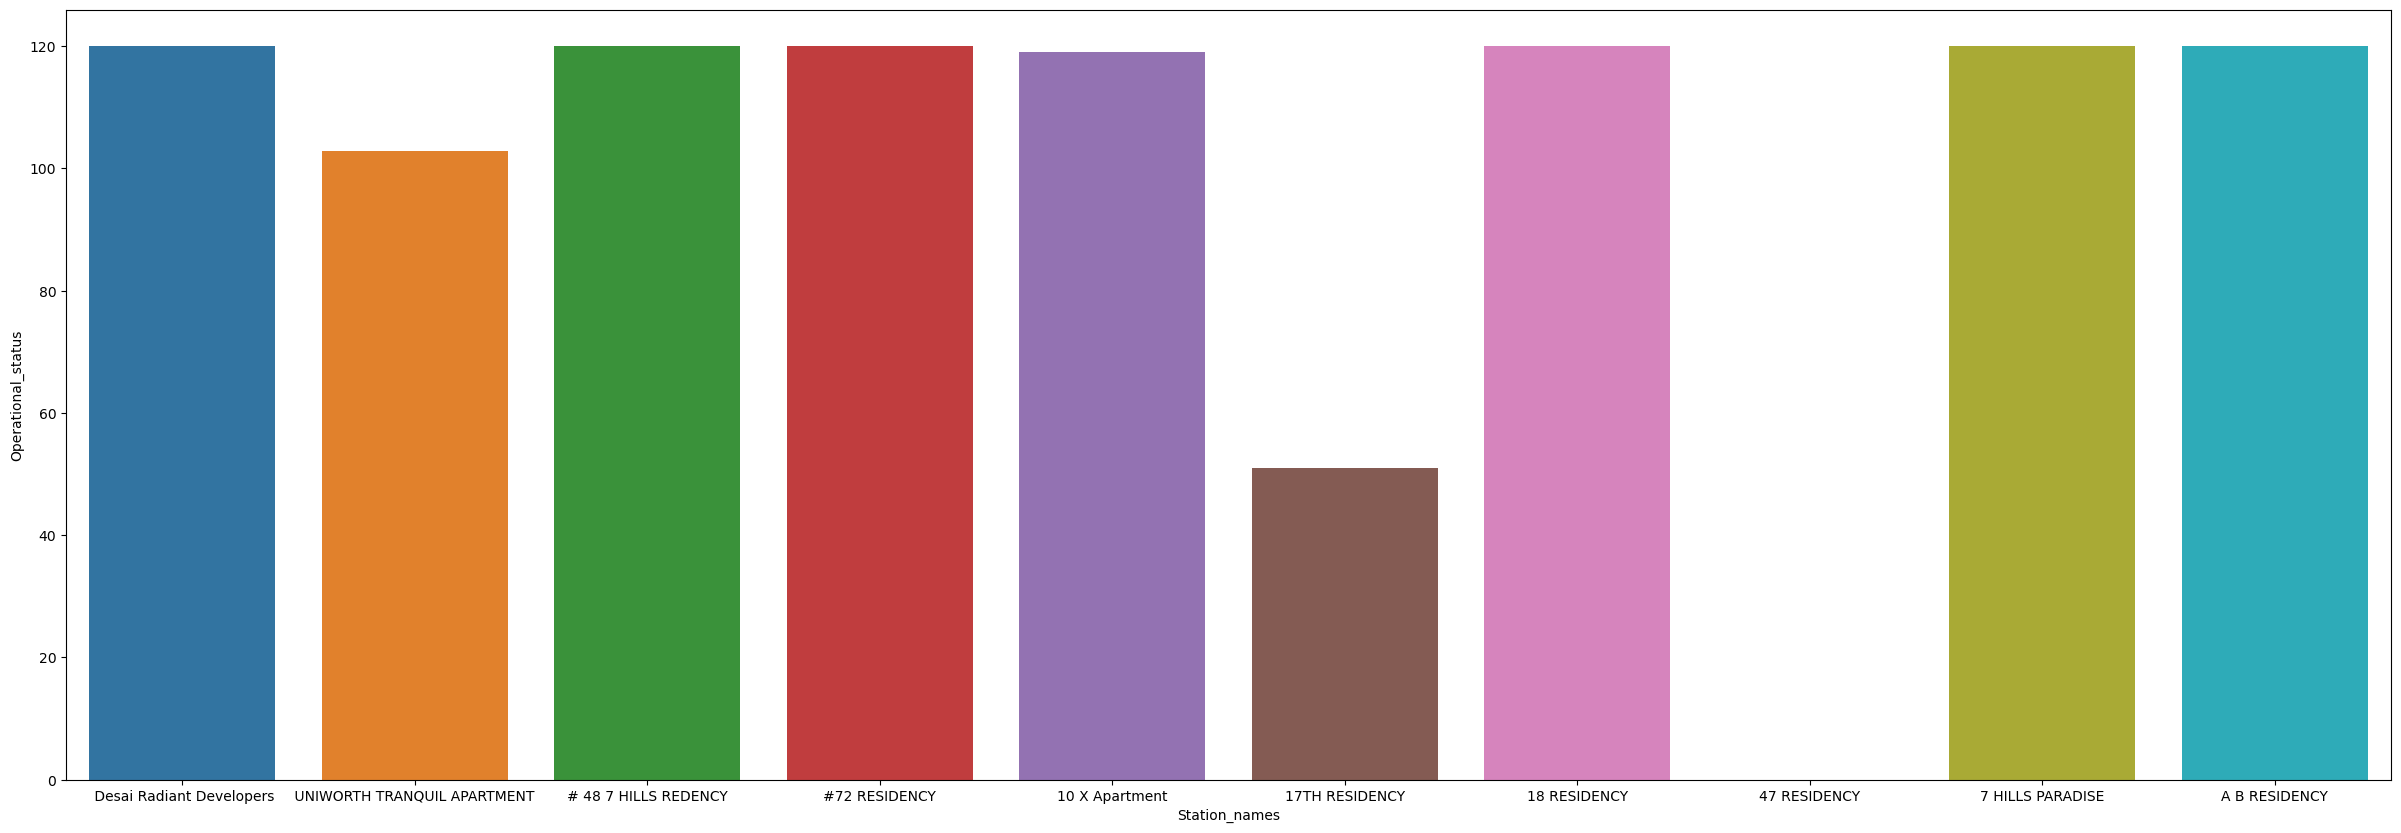

In [344]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x = 'Station_names', y = 'Operational_status', data = df1_temp_first, ax = ax)


<Axes: xlabel='Station_names', ylabel='Operational_status'>

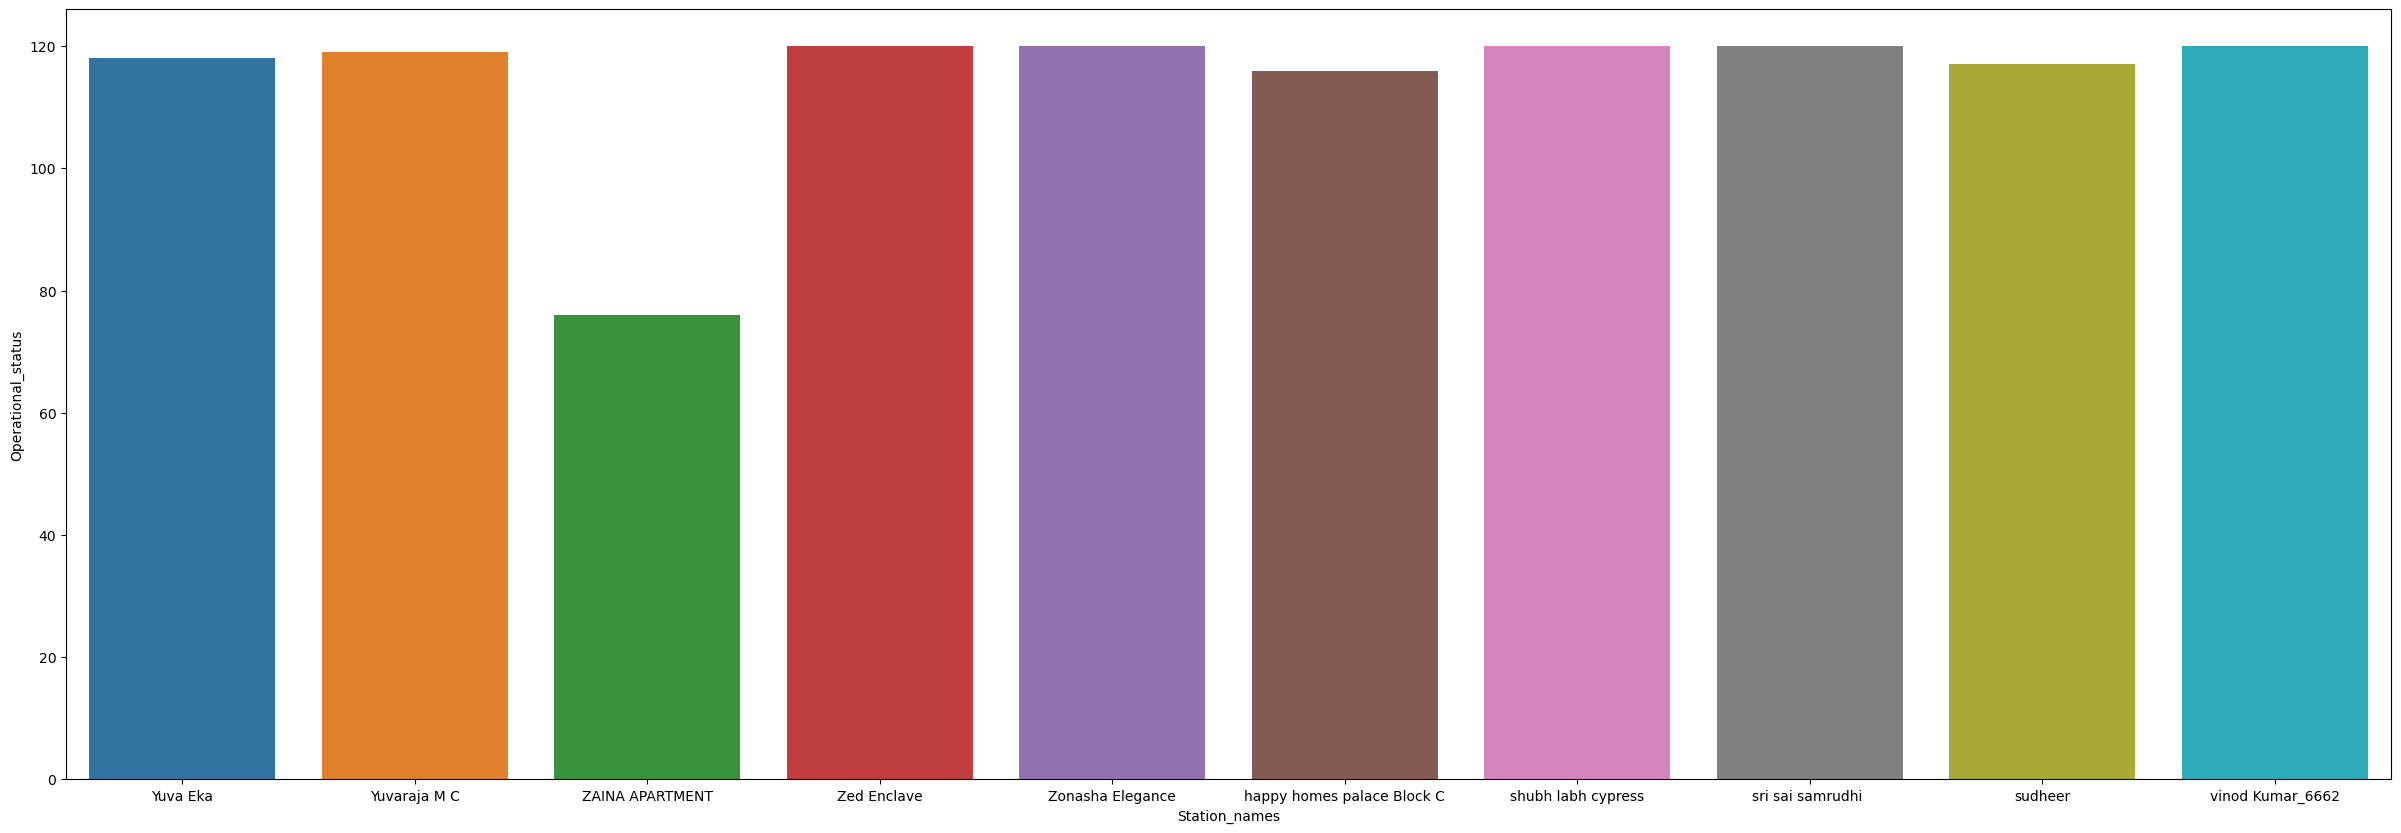

In [345]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x = 'Station_names', y = 'Operational_status', data = df1_temp_last, ax=ax)

# Q3

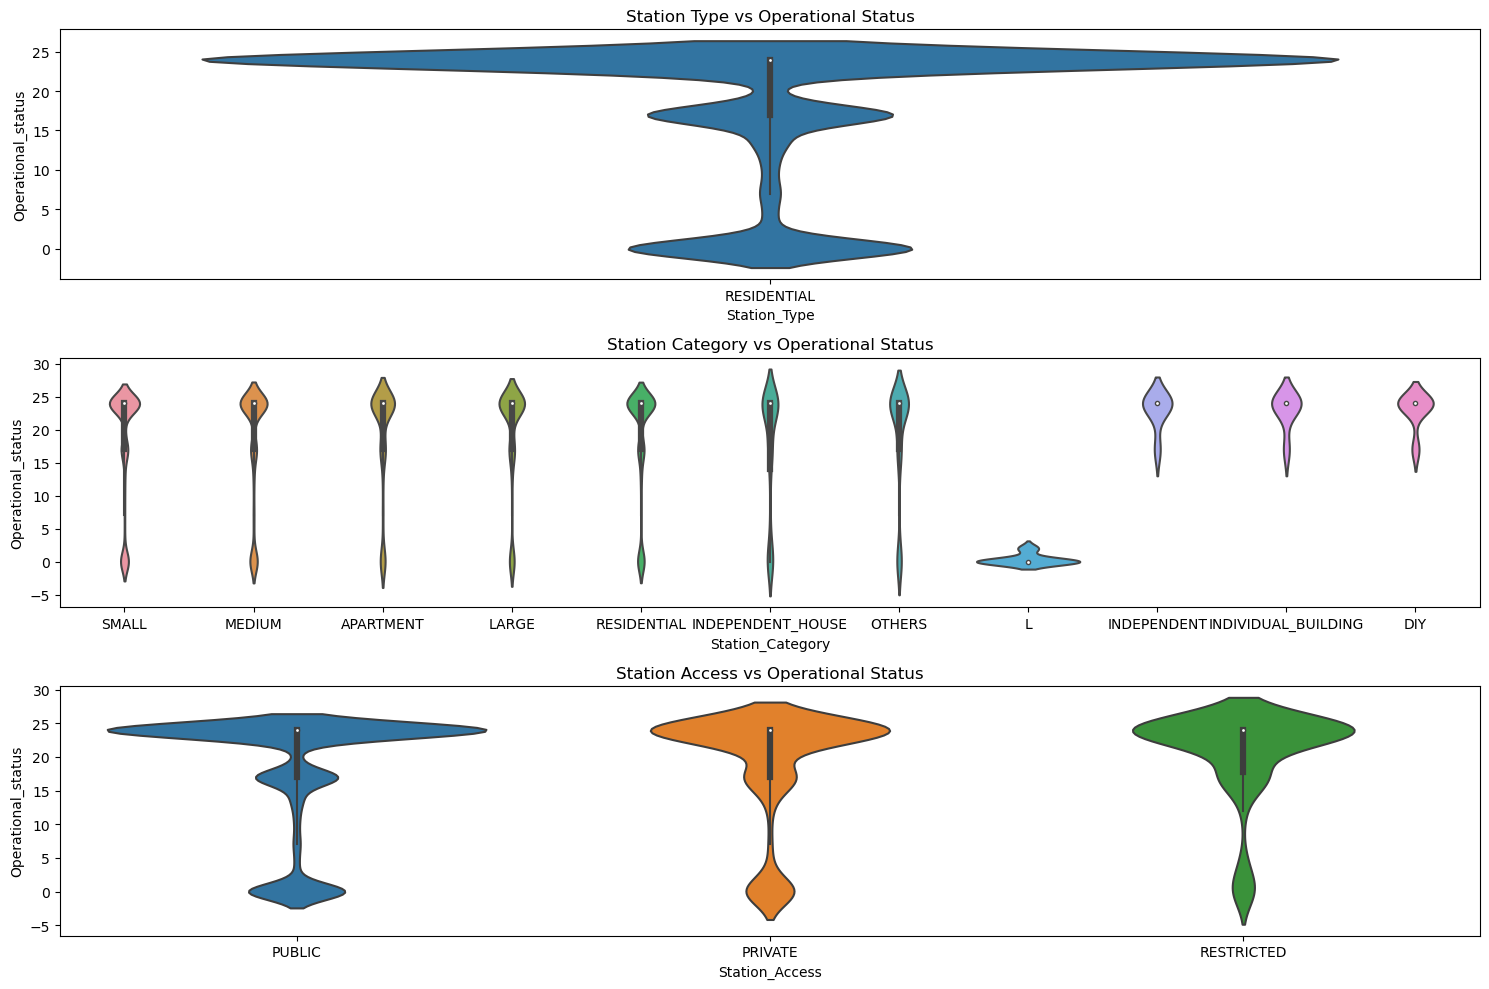

In [791]:
# Convert 'Ping_Date' column to datetime format
df['Ping_Date'] = pd.to_datetime(df['Ping_Date'])

# Extract relevant columns for analysis
columns_of_interest = ['Station_Type', 'Station_Category', 'Station_Access', 'Operational_status']
df_subset = df[columns_of_interest]

# Plotting using Seaborn violin plots
plt.figure(figsize=(15, 10))

# Violin plot for Station Type vs Operational Status
plt.subplot(3, 1, 1)
sns.violinplot(x='Station_Type', y='Operational_status', data=df_subset)
plt.title('Station Type vs Operational Status')

# Violin plot for Station Category vs Operational Status
plt.subplot(3, 1, 2)
sns.violinplot(x='Station_Category', y='Operational_status', data=df_subset)
plt.title('Station Category vs Operational Status')

# Violin plot for Station Access vs Operational Status
plt.subplot(3, 1, 3)
sns.violinplot(x='Station_Access', y='Operational_status', data=df_subset)
plt.title('Station Access vs Operational Status')

plt.tight_layout()
plt.show()


# Q4

In [851]:
hour_columns = [f'hour{i}' for i in range(24)]
hour_data = df[hour_columns]

row_means = hour_data.mean(axis=1)

df['Operational_status'] = row_means

In [852]:
df['Operational_status'] = df['Operational_status'].apply(lambda x: 0 if x < 0.5 else 1)

In [855]:
df.tail(100)

,StationID,Station_Name,Station_Type,Station_Category,Station_Access,ChargerID,Ping_Date,hour0,hour1,hour2,...,hour17,hour18,hour19,hour20,hour21,hour22,hour23,Operational_status,Day_of_Week,Hour
22429,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-26,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Sunday,0
22430,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-27,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,0
22431,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-28,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Tuesday,0
22432,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-29,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Wednesday,0
22433,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-30,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22524,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-25,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Saturday,0
22525,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-26,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Sunday,0
22526,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-27,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Monday,0
22527,ff8f7b91-a421-4dbe-8b96-c662fe2ab30b,PARIMALA SUNRIDGE,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S008697-1,2023-11-28,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,Tuesday,0


/Users/mirfarhanali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


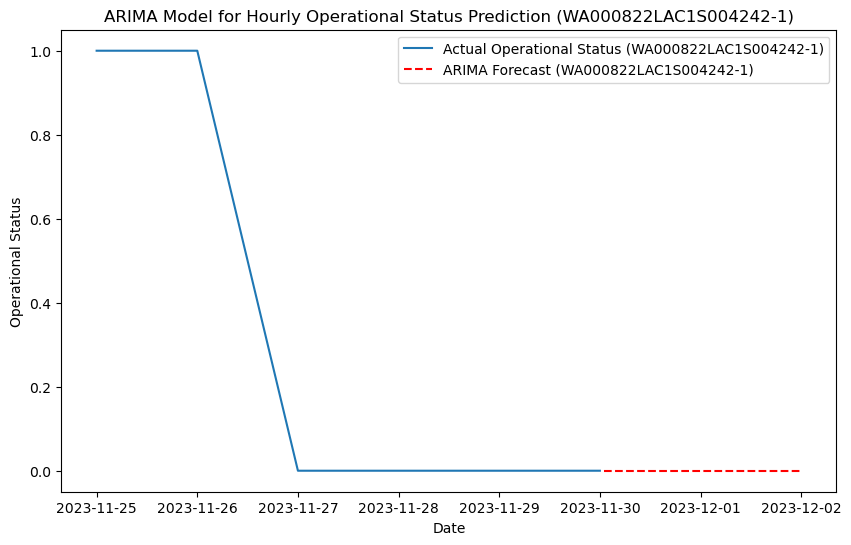

In [857]:

# Convert 'Ping_Date' column to datetime format
df['Ping_Date'] = pd.to_datetime(df['Ping_Date'])

# Choose a specific ChargerID for analysis
selected_charger_id = 'WA000822LAC1S004242-1'

# Filter data for the selected charger_id
charger_data = df[df['ChargerID'] == selected_charger_id][['Ping_Date', 'Operational_status']].set_index('Ping_Date')

# Resample data to get hourly operational status
hourly_status = charger_data.resample('H').mean()
# Train ARIMA model
model = ARIMA(hourly_status, order=(2, 1, 1))  # You can adjust the order based on your data characteristics
result = model.fit()

# Make predictions for the next 2 days (48 hours)
forecast_steps = 48
forecast = result.get_forecast(steps=forecast_steps)

# Get the forecast index (next 2 days)
forecast_index = pd.date_range(hourly_status.index[-1] + timedelta(hours=1), periods=forecast_steps, freq='H')

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(charger_data.index, charger_data, label=f'Actual Operational Status ({selected_charger_id})')
plt.plot(forecast_df.index, forecast_df['Forecast'], label=f'ARIMA Forecast ({selected_charger_id})', linestyle='--', color='red')
plt.title(f'ARIMA Model for Hourly Operational Status Prediction ({selected_charger_id})')
plt.xlabel('Date')
plt.ylabel('Operational Status')
plt.legend()
plt.show()


# Q5

## Using Z Score method

In [869]:

df['Ping_Date'] = pd.to_datetime(df['Ping_Date'])
z_scores = (df['Operational_status'] - df['Operational_status'].mean()) / df['Operational_status'].std()
threshold = 2
outliers = df[abs(z_scores) > threshold]
outliers


,StationID,Station_Name,Station_Type,Station_Category,Station_Access,ChargerID,Ping_Date,hour0,hour1,hour2,...,hour17,hour18,hour19,hour20,hour21,hour22,hour23,Operational_status,Day_of_Week,Hour
72,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-25,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Saturday,0
73,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-26,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,Sunday,0
74,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-27,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,0
75,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-28,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Tuesday,0
76,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-29,0,0,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22431,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-28,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Tuesday,0
22432,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-29,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Wednesday,0
22433,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-30,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Thursday,0
22444,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004662-1,2023-11-29,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Wednesday,0


## Using IQR method

In [872]:

Q1 = df['Operational_status'].quantile(0.25)
Q3 = df['Operational_status'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1


outliers1 = df[(df['Operational_status'] < Q1 - threshold * IQR) | (df['Operational_status'] > Q3 + threshold * IQR)]

outliers1

,StationID,Station_Name,Station_Type,Station_Category,Station_Access,ChargerID,Ping_Date,hour0,hour1,hour2,...,hour17,hour18,hour19,hour20,hour21,hour22,hour23,Operational_status,Day_of_Week,Hour
72,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-25,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Saturday,0
73,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-26,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,Sunday,0
74,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-27,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,0
75,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-28,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Tuesday,0
76,044bfec9-d63b-4355-ae6b-7c3e6010ca0b,HOLLYHOCK,RESIDENTIAL,SMALL,PUBLIC,WA000822LAC1S008891-1,2023-11-29,0,0,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22431,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-28,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Tuesday,0
22432,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-29,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Wednesday,0
22433,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004242-1,2023-11-30,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Thursday,0
22444,fee9deab-688c-40ca-aad9-713c8f941e8b,MBR SHANGRI LA APARTMENT,RESIDENTIAL,LARGE,PUBLIC,WA000822LAC1S004662-1,2023-11-29,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Wednesday,0


In [879]:
df['Station_Type'].value_counts()

RESIDENTIAL    22529
Name: Station_Type, dtype: int64